other:16034
one:2081
two:4065
four:676
three:13
[2081, 4065, 13, 676, 16034]


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29289 missing from c

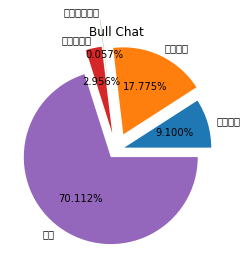

In [6]:
input_file = "barrage1.csv"

def typeDM():
    bull_chat_list = []
    with open(input_file, "r", encoding="utf-8") as file_in:
        for one_line in file_in:
            one_line = one_line.strip("\n")
            bull_chat_list.append(one_line)

    #categories
    type_one_list = '长得,美,丑,身材,胖,肥,瘦,苗条,身高,性感,可爱,眉毛,' \
          '眼睛,鼻子,耳朵,睫毛,嘴,头发,胳膊,腿,手,脚,腰,胸,屁股,臀,欧派'.split(',')
    
    type_two_list = '好吃,不好吃,想吃,香,诱人,可口,美食,多,油,油腻,热量,恶心,' \
          '呕,吐,这也能吃,不敢吃,不健康垃圾食品,鸡腿,汉堡,方便面,火鸡面,' \
          '火腿,玉米,薯片,巧克力,冰淇淋,披萨,炸鸡,鸡翅,鸡腿海鲜,螃蟹,蟹腿,' \
          '龙虾,虾,扇贝,鸡,鸭,鱼,猪,牛肉,兔口水,馋,饿'.split(',')
    
    type_three_list = '听上去,听起来,好听,听着,空耳咔,沙沙'.split(',')
    
    type_four_list = '哥哥,姐姐,弟弟,妹妹,老公,老婆,女朋友,女票,男朋友,男票,' \
           '小心,当心,心疼,注意,催吐,厉害,了不起,优秀,爱了,佩服,讨厌,' \
           '烦,变态,爱看,不爱看,来了,打卡,报到,晚安,有人吗,' \
           '么么,亲,awsl,xswl'.split(',')

    xTicks_list = ['主播长相','食物本身','吃东西的声音','社交性话语','其他']


    #Start classification
    bull_chat_contain_dict = {}
    bull_chat_count_list = [0,0,0,0,0]
    
    #5 kind of barrage
    for one_bull_chat in bull_chat_list:
        match = False
        for one_tag in type_one_list:
            if one_tag in one_bull_chat:
                if "one" not in bull_chat_contain_dict.keys():
                    bull_chat_contain_dict.update({"one" : [one_bull_chat]})
                else:
                    bull_chat_contain_dict["one"].append(one_bull_chat)
                bull_chat_count_list[0] += 1
                match = True
        
        for one_tag in type_two_list:
            if one_tag in one_bull_chat:
                if "two" not in bull_chat_contain_dict.keys():
                    bull_chat_contain_dict.update({"two" : [one_bull_chat]})
                else:
                    bull_chat_contain_dict["two"].append(one_bull_chat)
                bull_chat_count_list[1] += 1
                match = True

        for one_tag in type_three_list:
            if one_tag in one_bull_chat:
                if "three" not in bull_chat_contain_dict.keys():
                    bull_chat_contain_dict.update({"three" : [one_bull_chat]})
                else:
                    bull_chat_contain_dict["three"].append(one_bull_chat)
                bull_chat_count_list[2] += 1
                match = True

        for one_tag in type_four_list:
            if one_tag in one_bull_chat:
                if "four" not in bull_chat_contain_dict.keys():
                    bull_chat_contain_dict.update({"four" : [one_bull_chat]})
                else:
                    bull_chat_contain_dict["four"].append(one_bull_chat)
                bull_chat_count_list[3] += 1
                match = True

        if not match:
            if "other" not in bull_chat_contain_dict.keys():
                bull_chat_contain_dict.update({"other" : [one_bull_chat]})
            else:
                bull_chat_contain_dict["other"].append(one_bull_chat)
            bull_chat_count_list[4] += 1
        
    #save
    bull_chat_contain_dict_key_list = list(bull_chat_contain_dict.keys())
    for one_key in bull_chat_contain_dict_key_list:
        bull_chat_contain_list = bull_chat_contain_dict[one_key]
        output_file_name = one_key + ".csv"
        with open(output_file_name, "w", encoding="utf-8") as file_out:
            for one_bull_chat in bull_chat_contain_list:
                file_out.write(one_bull_chat + "\n")
        #list长度就是计数值
        count = len(bull_chat_contain_list)
        print(one_key + ":" + str(count))
        
    print(bull_chat_count_list)
    
    #画饼图
    import matplotlib.pyplot as plt
    #设置离开圆心的间隙
    expl = [0.1,0.2,0.5,0.2,0.1]
    plt.pie(x=bull_chat_count_list, explode=expl, labels=xTicks_list, autopct='%.3f%%')
    #图片名
    plt.title("Bull Chat")
    #显示图片
    plt.show()
    #保存图片  
    plt.savefig("Bull_Chat")
    plt.close()
    
def main():
    typeDM()

if __name__ == "__main__":
    main()